two-phased method

# Libs

### config

In [3]:
# config
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/config.ipynb'

### functions

In [4]:
# functions
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/About Main Data _ ts/functions_ts.ipynb'

### my_classes

In [5]:
# classes
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/About Main Data _ ts/classes_ts.ipynb'

In [6]:
import math

import enlighten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")

# read_dataset_ts

In [8]:
df_main = read_dataset_ts()
print_dataset_info()

Software Name         : Hbase
Number of rows        : 166,096
Number of classes     : 5,940


In [9]:
df_main

,class_id,time_stamp,label
0,120028,1462480544,0
1,120028,1552570943,0
2,120028,1583149803,0
3,120029,1504439382,0
4,120029,1506484519,1
...,...,...,...
166091,166933,1180977250,0
166092,166934,1177449188,0
166093,166934,1178567933,0
166094,166936,1177018481,0


# create_empty_unique_class_prediction

In [10]:
def create_empty_unique_class_predictions():
    # columns name & columns dtype
    columns_name = preprocessing_params["output"]["unique_class_predictions"]["columns_name"]
    columns_dtype = preprocessing_params["output"]["unique_class_predictions"]["columns_dtype"]

    temp_column_number = len(columns_dtype)
    for th in knn_accuracy_threshold:
        temp_column_name = prediction_column_name(th)
        columns_name.append(temp_column_name)
        columns_dtype[temp_column_number] = pd.Int32Dtype()
        temp_column_number += 1

    # create 
    temp_df_structure = {}
    for cn, cd in zip(columns_name, columns_dtype.values()):
        temp_df_structure[cn] = pd.Series(dtype=cd)
    empty_unique_class_predictions = pd.DataFrame(temp_df_structure)
    print(empty_unique_class_predictions.dtypes)
    print("-" * 50)

    return empty_unique_class_predictions

In [11]:
empty_unique_class_predictions = create_empty_unique_class_predictions()
print(empty_unique_class_predictions.dtypes)
empty_unique_class_predictions

class_id            int64
predictions_0.01    Int32
predictions_0.5     Int32
predictions_0.55    Int32
predictions_0.6     Int32
predictions_0.65    Int32
predictions_0.7     Int32
predictions_0.75    Int32
predictions_0.8     Int32
predictions_0.85    Int32
predictions_0.9     Int32
predictions_0.95    Int32
dtype: object
--------------------------------------------------
class_id            int64
predictions_0.01    Int32
predictions_0.5     Int32
predictions_0.55    Int32
predictions_0.6     Int32
predictions_0.65    Int32
predictions_0.7     Int32
predictions_0.75    Int32
predictions_0.8     Int32
predictions_0.85    Int32
predictions_0.9     Int32
predictions_0.95    Int32
dtype: object


,class_id,predictions_0.01,predictions_0.5,predictions_0.55,predictions_0.6,predictions_0.65,predictions_0.7,predictions_0.75,predictions_0.8,predictions_0.85,predictions_0.9,predictions_0.95


### Fill class_id

In [12]:
dfg = df_main.groupby("class_id")
empty_unique_class_predictions["class_id"] = list(map(int, list(dfg.groups.keys())))
print(empty_unique_class_predictions.dtypes)
empty_unique_class_predictions

class_id            int64
predictions_0.01    Int32
predictions_0.5     Int32
predictions_0.55    Int32
predictions_0.6     Int32
predictions_0.65    Int32
predictions_0.7     Int32
predictions_0.75    Int32
predictions_0.8     Int32
predictions_0.85    Int32
predictions_0.9     Int32
predictions_0.95    Int32
dtype: object


,class_id,predictions_0.01,predictions_0.5,predictions_0.55,predictions_0.6,predictions_0.65,predictions_0.7,predictions_0.75,predictions_0.8,predictions_0.85,predictions_0.9,predictions_0.95
0,120028,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,120029,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,120030,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,120031,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,120032,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
5935,166926,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5936,166932,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5937,166933,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5938,166934,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# TimeseriesPredictionOfClassLabel

In [13]:
tpcl = TimeseriesPredictionOfClassLabel(
    df_main.copy(), 
    empty_unique_class_predictions,
    knn_model_params, 
    knn_accuracy_threshold
)

In [14]:
tpcl.make_progress_lines()
tpcl.make_predictions()

In [15]:
unique_class_predictions = tpcl.unique_class_predictions

In [16]:
unique_class_predictions.dtypes

class_id            int64
predictions_0.01    Int32
predictions_0.5     Int32
predictions_0.55    Int32
predictions_0.6     Int32
predictions_0.65    Int32
predictions_0.7     Int32
predictions_0.75    Int32
predictions_0.8     Int32
predictions_0.85    Int32
predictions_0.9     Int32
predictions_0.95    Int32
dtype: object

In [17]:
unique_class_predictions.head(100)

,class_id,predictions_0.01,predictions_0.5,predictions_0.55,predictions_0.6,predictions_0.65,predictions_0.7,predictions_0.75,predictions_0.8,predictions_0.85,predictions_0.9,predictions_0.95
0,120028,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,120029,0,0,0,0,0,0,0,0,0,0,0
2,120030,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,120031,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,120032,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
95,120125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
96,120126,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
97,120127,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
98,120128,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>


# calc_percentage_predictable_classes

In [18]:
print("number of classes                            :", f"{len(unique_class_predictions):,d}")
percentage_predictable_classes = calc_percentage_predictable_classes()
print("percentage of pridictable classes in eahc th :", percentage_predictable_classes)

number of classes                            : 5,940
percentage of pridictable classes in eahc th : [41, 34, 34, 32, 30, 27, 24, 22, 20, 17, 14]


# plot_percentage_predictable_classes

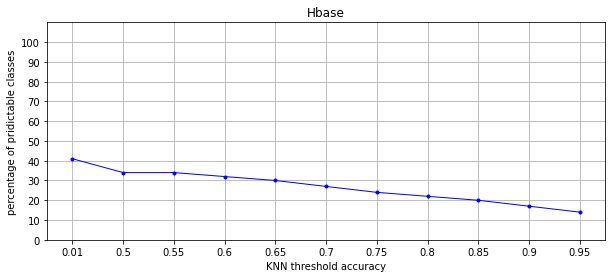

In [19]:
plot_percentage_predictable_classes(percentage_predictable_classes)

# Save: unique_class_predictions

In [20]:
unique_class_predictions.to_csv(mypaths["output"]["unique_class_predictions"], 
                                index=False, na_rep="NULL")